In [12]:
import pandas as pd
data=pd.read_csv("/content/Indian_Startup_Investment_Trends.csv")
print(data)

      Startup_ID           Name      Sector Sub-Sector       City  \
0       a713cd4f      Startup_0      Retail      Sub_2       Pune   
1       b75f6987      Startup_1      EdTech      Sub_2       Pune   
2       d5ba7ec2      Startup_2    AgriTech      Sub_7    Chennai   
3       5190a643      Startup_3  HealthTech      Sub_8     Mumbai   
4       a6801a40      Startup_4  HealthTech      Sub_6  Bangalore   
...          ...            ...         ...        ...        ...   
12423   0f13d364  Startup_12423  HealthTech     Sub_10       Pune   
12424   377d998c  Startup_12424      EdTech      Sub_2     Mumbai   
12425   be50b852  Startup_12425      EdTech      Sub_9       Pune   
12426   574ecf87  Startup_12426  HealthTech      Sub_1       Pune   
12427   1d0384ad  Startup_12427      Retail      Sub_9      Delhi   

             State  Founded_Year Founder_Name Funding_Stage   Investment_Type  \
0      Maharashtra          2022  Founder_356      Series D             Grant   
1        

In [13]:
data.isna().sum()

Startup_ID                0
Name                      0
Sector                    0
Sub-Sector                0
City                      0
State                     0
Founded_Year              0
Founder_Name              0
Funding_Stage             0
Investment_Type           0
Amount_Raised             0
Investors_Count           0
Lead_Investor             0
Co-Investors              0
Valuation_Post_Funding    0
Revenue                   0
Profitability             0
Number_of_Employees       0
Tech_Stack                0
Primary_Product           0
Customer_Base_Size        0
Growth_Rate               0
Exit_Status               0
Funding_Date              0
Pitch_Deck_Link           0
Social_Media_Followers    0
Competitors               0
Patents                   0
ESG_Score                 0
Diversity_Index           0
Net_Impact_Score          0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Startup_ID"]=b.fit_transform(data["Startup_ID"])
data["Name"]=b.fit_transform(data["Name"])
data["Sector"]=b.fit_transform(data["Sector"])
data["Sub-Sector"]=b.fit_transform(data["Sub-Sector"])
data["City"]=b.fit_transform(data["City"])
data["State"]=b.fit_transform(data["State"])
data["Founder_Name"]=b.fit_transform(data["Founder_Name"])
data["Funding_Stage"]=b.fit_transform(data["Funding_Stage"])
data["Investment_Type"]=b.fit_transform(data["Investment_Type"])
data["Lead_Investor"]=b.fit_transform(data["Lead_Investor"])
data["Co-Investors"]=b.fit_transform(data["Co-Investors"])
data["Profitability"]=b.fit_transform(data["Profitability"])
data["Tech_Stack"]=b.fit_transform(data["Tech_Stack"])
data["Primary_Product"]=b.fit_transform(data["Primary_Product"])
data["Exit_Status"]=b.fit_transform(data["Exit_Status"])
data["Pitch_Deck_Link"]=b.fit_transform(data["Pitch_Deck_Link"])
data["Competitors"]=b.fit_transform(data["Competitors"])
data["Funding_Date"]=pd.to_datetime(data["Funding_Date"],errors='coerce')
data["Funding_Date"]=b.fit_transform(data["Funding_Date"])
print(data)

       Startup_ID  Name  Sector  Sub-Sector  City  State  Founded_Year  \
0            8111     0       5           2     5      2          2022   
1            8867     1       1           2     5      1          2019   
2           10381  3540       0           7     1      3          2010   
3            3964  4651       4           8     4      4          2007   
4            8075  5762       4           6     0      2          2019   
...           ...   ...     ...         ...   ...    ...           ...   
12423         688  2696       4           1     5      4          2016   
12424        2645  2697       1           2     4      3          2017   
12425        9218  2698       1           9     5      0          2014   
12426        4244  2699       4           0     5      0          2012   
12427        1351  2700       5           9     2      1          2016   

       Founder_Name  Funding_Stage  Investment_Type  ...  Growth_Rate  \
0               286              5    

In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)
x=pd.DataFrame(data=x,columns=["a","b"])

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain,ytrain)

                 a             b
2976  2.355082e+07 -1.663789e+06
9460  4.487915e+07  2.615608e+06
1535  1.990912e+07 -3.225550e+06
5037 -3.560685e+07 -3.209667e+06
5822 -1.898577e+07  4.258642e+06
...            ...           ...
7551 -3.650903e+07  8.275149e+05
630   1.893251e+06 -4.296875e+05
8715  9.162926e+06 -1.500150e+06
8310 -4.054002e+07 -2.400783e+06
3248 -2.628963e+07 -1.929515e+05

[12179 rows x 2 columns] 2976    7.69
9460    2.30
1535    2.63
5037    3.10
5822    8.71
        ... 
7551    1.37
630     6.71
8715    4.30
8310    1.42
3248    1.71
Name: Net_Impact_Score, Length: 12179, dtype: float64


In [21]:
from sklearn.linear_model import LinearRegression
br=LinearRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

In [22]:
c=br.predict([[5.597342,3.645321]])
print(c)

[5.4825338]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[140., 129., 129., 127., 112., 135., 116., 106., 129., 118.],
        [125., 117., 133., 133., 119., 130., 108., 129., 119., 125.],
        [113., 114., 106., 128., 134., 119., 126., 119., 127., 103.],
        [107., 138., 115., 110., 108., 120., 116., 103., 135., 132.],
        [120., 105., 116., 118., 100., 137., 105.,  98., 118.,  94.],
        [ 97., 126., 125., 116., 130., 119., 112., 136., 119., 118.],
        [116., 117., 120., 123., 141., 129., 104., 109., 127., 125.],
        [102., 121., 108., 116., 111., 102., 104., 102., 125., 130.],
        [106., 113., 129., 101., 115., 122., 132., 104., 118.,  92.],
        [179., 216., 170., 190., 176., 153., 181., 172., 199., 167.]]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <matplotlib.collections.QuadMesh at 0x7ef5c6162350>)

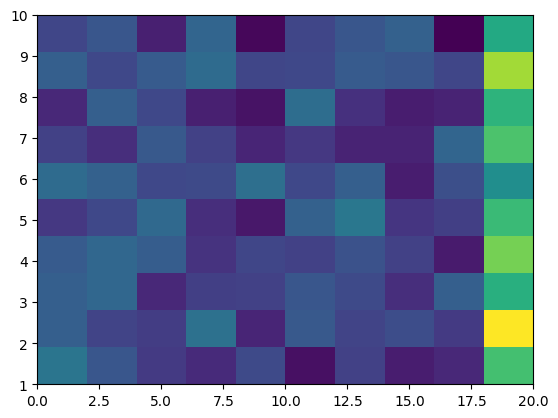

In [25]:
from matplotlib import pyplot as plt
plt.hist2d(data["Patents"],data["Net_Impact_Score"])